In [24]:
import pandas as pd
data = pd.read_csv("/home/leong/Desktop/Global Landslide/Global_Landslide_Catalog_Export.csv")

data.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [25]:
data.isnull().sum()

source_name                      0
source_link                    846
event_id                         0
event_date                       0
event_time                   11033
event_title                      0
event_description              862
location_description           102
location_accuracy                2
landslide_category               1
landslide_trigger               23
landslide_size                   9
landslide_setting               69
fatality_count                1385
injury_count                  5674
storm_name                   10456
photo_link                    9537
notes                        10716
event_import_source           1563
event_import_id               1562
country_name                  1562
country_code                  1564
admin_division_name           1637
admin_division_population     1562
gazeteer_closest_point        1563
gazeteer_distance             1562
submitted_date                  10
created_date                     1
last_edited_date    

In [26]:
#separating date and time
data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')

# Extract date component
data['event_date'] = data['event_date'].dt.strftime('%m/%d/%Y')  # Format date as 'MM/DD/YYYY'

# Extract time component from the original 'event_date' column
data['event_time'] = pd.to_datetime(data['event_date'], errors='coerce').dt.strftime('%I:%M:%S %p')

# Check the resulting DataFrame
print(data[['event_date', 'event_time']].head())


   event_date   event_time
0  08/01/2008  12:00:00 AM
1  01/02/2009  12:00:00 AM
2  01/19/2007  12:00:00 AM
3  07/31/2009  12:00:00 AM
4  10/16/2010  12:00:00 AM


User Story 1: As an analyst, I want to visualize the frequency of landslide events over time.

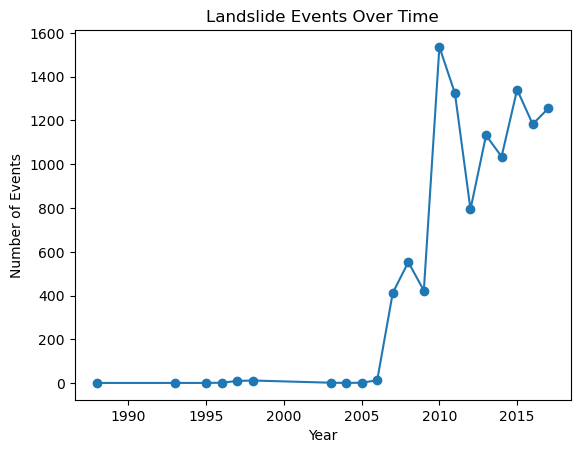

In [27]:
import matplotlib.pyplot as plt

data['event_date'] = pd.to_datetime(data['event_date'])

# Group by year and count the number of events
yearly_counts = data.groupby(data['event_date'].dt.year).size()

# Plotting the results
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Landslide Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()


User Story2: As an analyst, I want to visualize the distribution of landslides on a map.

/tmp/ipykernel_5945/3568868926.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


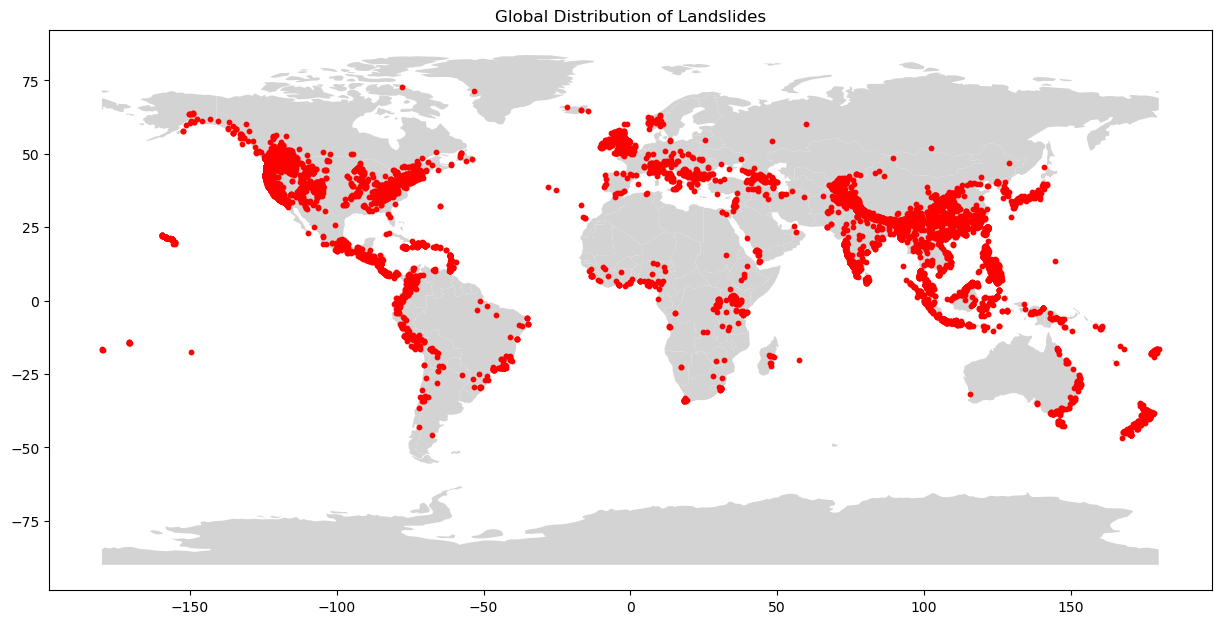

In [28]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(lon, lat) for lon, lat in zip(data['longitude'], data['latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the map
ax = world.plot(figsize=(15, 10), color='lightgrey')
gdf.plot(ax=ax, color='red', markersize=10)
plt.title('Global Distribution of Landslides')
plt.show()


User Story3: As an analyst, I want to analyze the most common triggers for landslides.

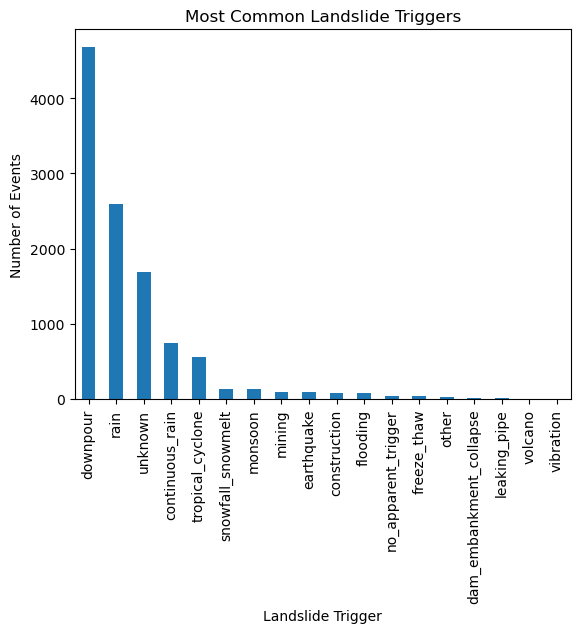

In [29]:
trigger_counts = data['landslide_trigger'].value_counts()

# Plotting the results
trigger_counts.plot(kind='bar')
plt.title('Most Common Landslide Triggers')
plt.xlabel('Landslide Trigger')
plt.ylabel('Number of Events')
plt.show()

User can input name of country and then get details of all landslides that happended there

In [31]:
import pandas as pd

def search_landslide_by_country(country):
    # Convert country to lowercase for case-insensitive search
    country = country.lower()

    # Filter the dataset based on the entered country
    result = data[data['country_name'].str.lower().str.contains(country, na=False)]

    return result

user_country = input("Enter a country to search for landslides: ")

# Perform the search
result_df = search_landslide_by_country(user_country)


if not result_df.empty:
    print("Landslide information for the entered country:", user_country)
    print(result_df)
else:
    print("No landslide information found for the entered country.")


Landslide information for the entered country: cameroon
        source_name                                        source_link  \
1227  allafrica.com     http://allafrica.com/stories/200908050315.html   
2077  allafrica.com     http://allafrica.com/stories/201108020283.html   
3303        apanews  http://www.apanews.net/apa.php?page=show_count...   
9848  Allafrica.com     http://allafrica.com/stories/200710040802.html   

      event_id event_date   event_time  \
1227      1070 2009-08-04  12:00:00 AM   
2077      3858 2011-07-29  12:00:00 AM   
3303       847 2008-10-16  12:00:00 AM   
9848       283 2007-09-27  12:00:00 AM   

                                            event_title  \
1227  The Bamenda station hill on road, crossed at C...   
2077                                  Bonanjo, Cameroon   
3303                                     Bafoussam City   
9848     Abuh, Fundong Subdivision, North West Province   

                                      event_description  \
1227  T